# Assignment (III)

---


##Please write your full name/names and student IDs here:




*   Full Name:
*   Student ID:



---


#Question 1. (3 points)
* **For this question, please follow the steps outlined below:**
## Part (a):

* **Data Loading:** Read the lymph dataset from your mounted Google Drive using Pandas.

* **Data Splitting:** Split the dataset randomly into a 60% training set and a 40% test set using scikit-learn's train_test_split function.

* **Handling Categorical Data:** Encode categorical attributes with one-hot encoding using pandas.get_dummies, dropping the first attribute to avoid redundancy.

* **Decision Tree Classifier (1st Experiment):** Train a Decision Tree classifier in scikit-learn on the training data, setting the splitting criterion to "entropy," and requiring a minimum of 4 samples to split an internal node. Keep other settings unchanged.

* **Reproducibility:** Set the random_state to 32 in train_test_split and DecisionTreeClassifier to make your codes reproducible.

* **Performance Evaluation (1st Experiment):** Report the Decision Tree classifier's accuracy on the test data. Also, generate a high-resolution tree visualization (use plt.figure(figsize=(12, 8), dpi=300)).





In [ ]:
# import pandas as pd
# from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_csv("/content/drive/MyDrive/EECS4412/data/lymph.csv")  # Load your dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Shape: (148, 19)
  'lymphatics' 'block_of_affere' 'bl_of_lymph_c' 'bl_of_lymph_s' 'by_pass'  \
0       arched               yes              no              no        no   
1    displaced               yes              no              no       yes   
2     deformed                no              no              no       yes   
3       arched                no              no              no        no   
4       arched                no              no              no        no   

  'extravasates' 'regeneration_of' 'early_uptake_in'  'lym_nodes_dimin'  \
0             no                no               yes                  1   
1            yes                no               yes                  1   
2            yes               yes                no                  3   
3            yes                no               yes                  1   
4         

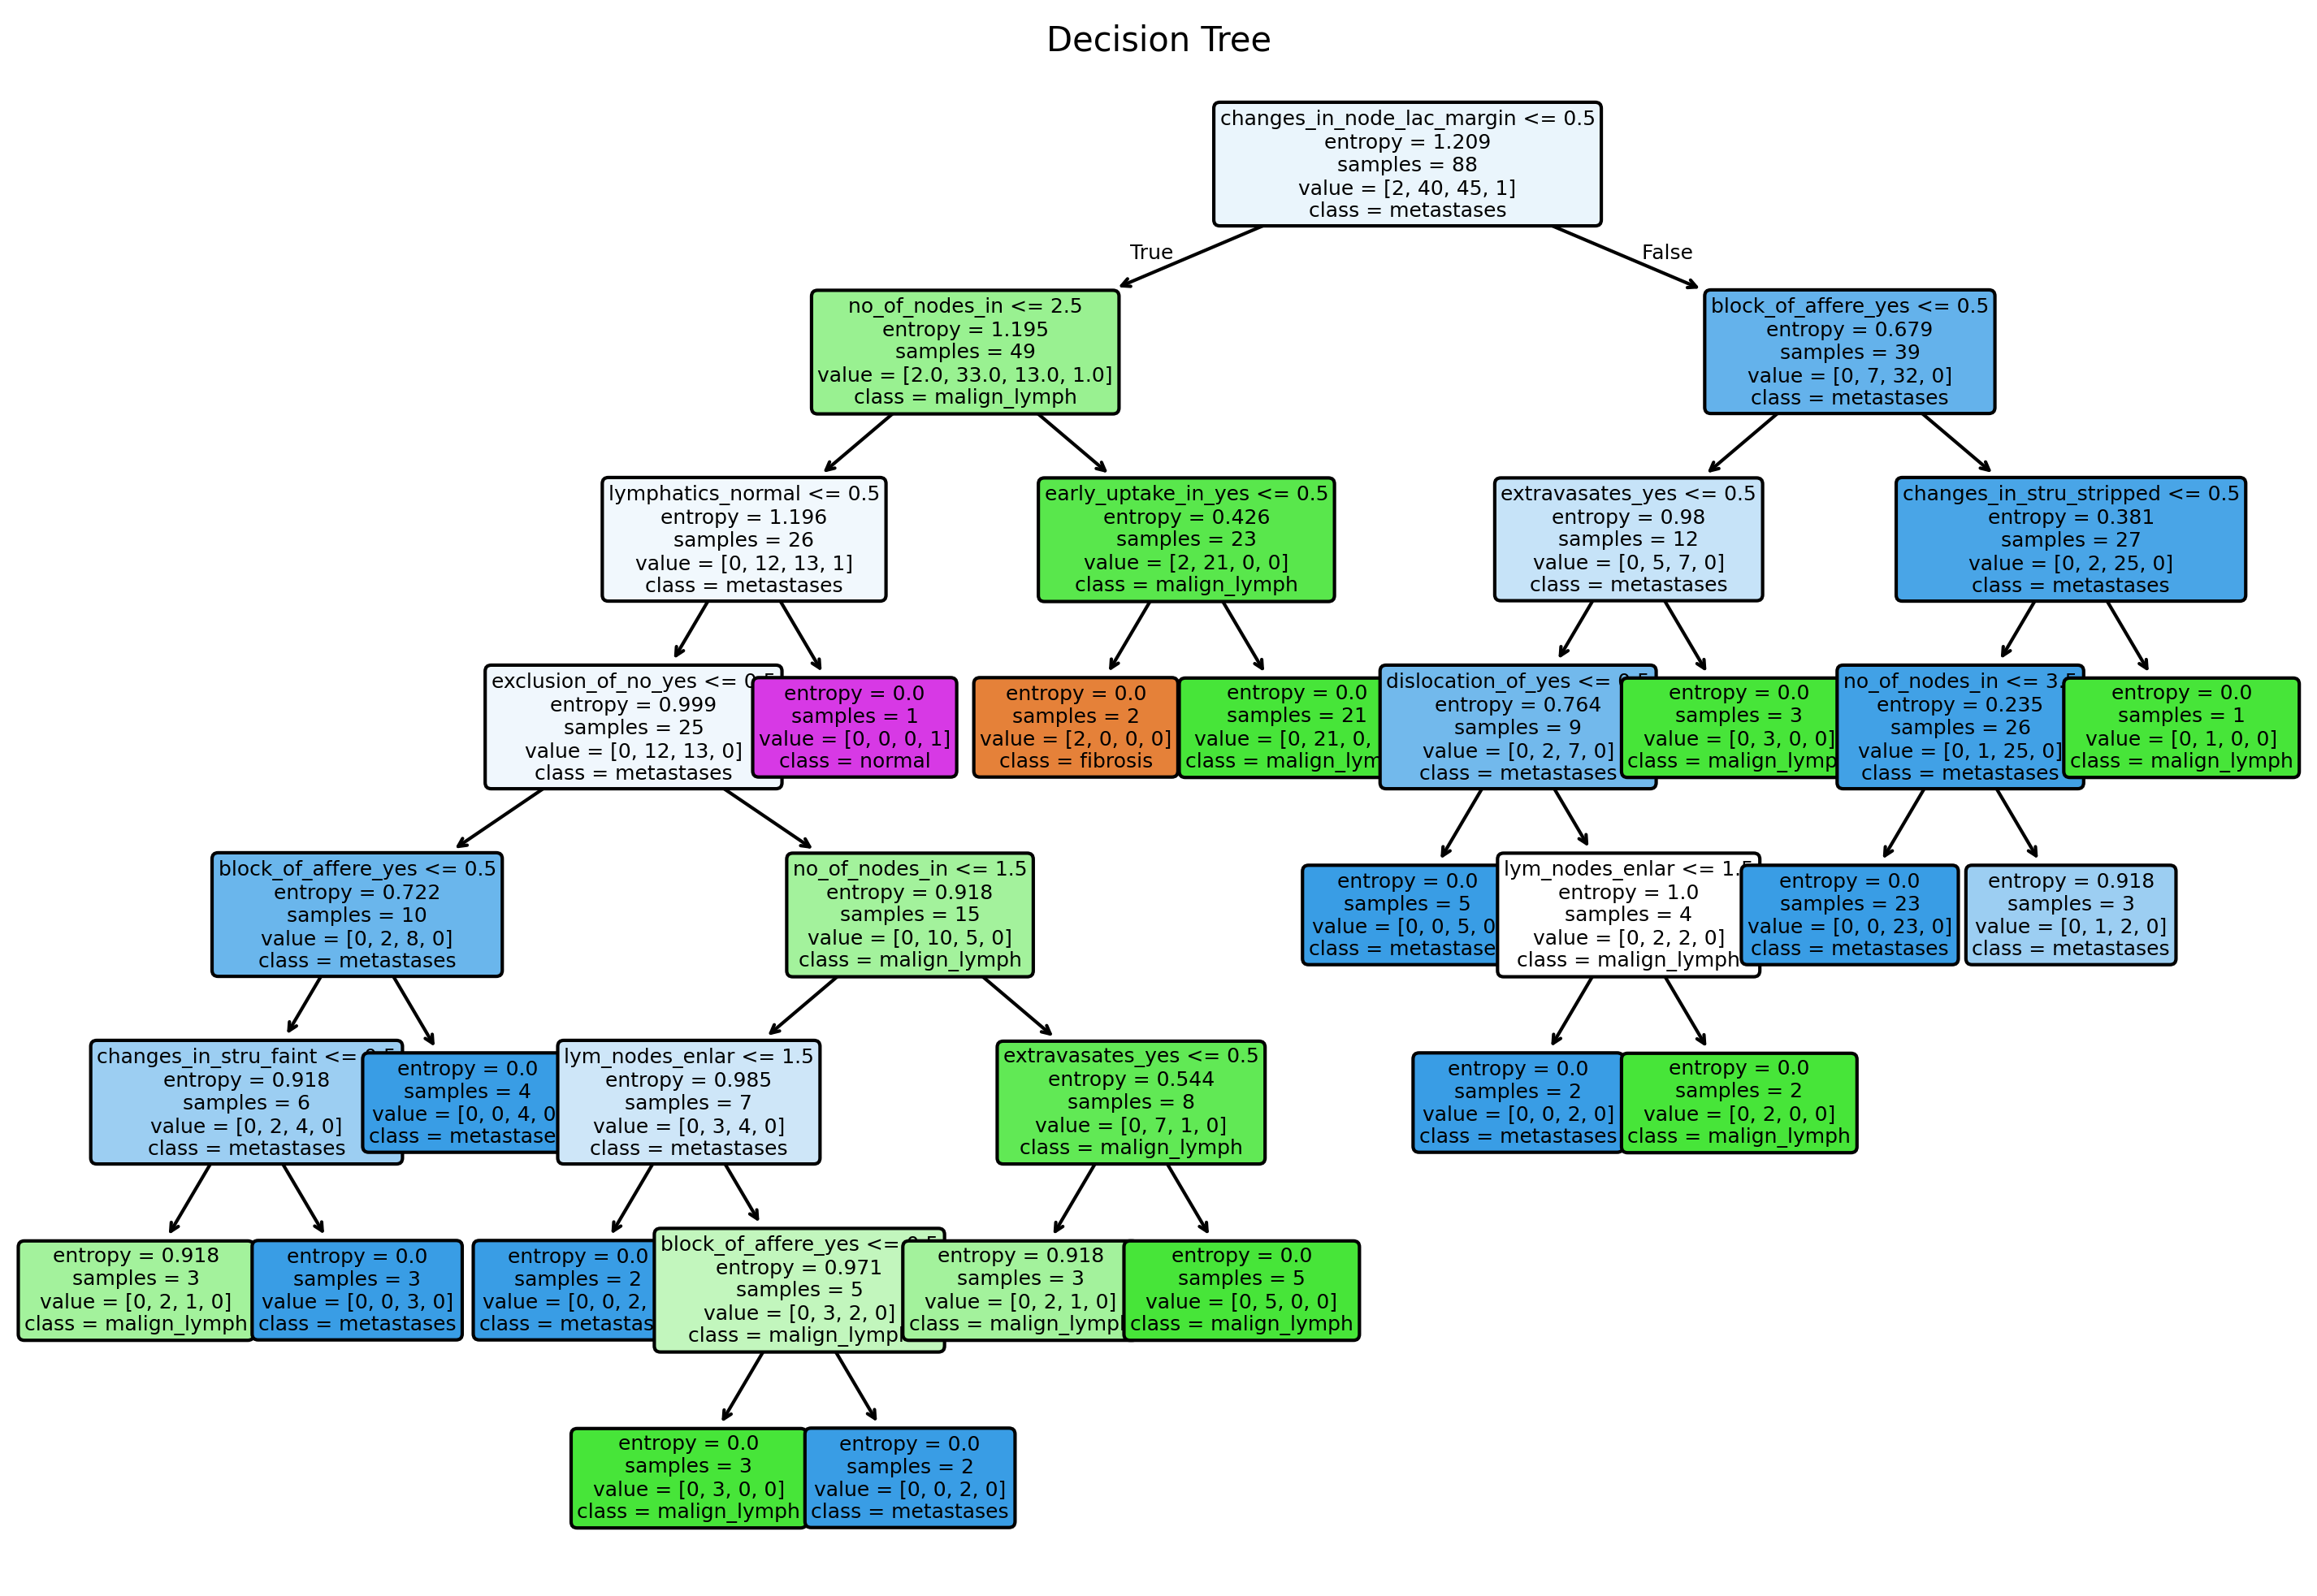

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from google.colab import drive
drive.mount('/content/drive')
# df = pd.read_csv("/content/drive/MyDrive/data-mining-assignment3/datasets/lymph.csv")  # Load your dataset
data = pd.read_csv("/content/drive/MyDrive/EECS4412/data/lymph.csv")  # Load your dataset

#.............................................................................
# write the rest here
print('Shape:', data.shape)
print(data.head())
data.columns = data.columns.str.replace("'", "").str.replace('"', '').str.strip()
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=32)
print(f'Training set: {X_train.shape}, Test set: {X_test.shape}')
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
# align training and testing cols after encoding, in case generated cols are not identical
# if col in train, but not in test, add in test and fill values with 0
# if col in test, but not in train, remove from test
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
print('Remaining object columns:', X_train.select_dtypes('object').columns.tolist())
clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=4, random_state=32)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('\nAccuracy:', accuracy_score(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))
plt.figure(figsize=(12, 8), dpi=300)
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=[str(cls) for cls in clf.classes_], rounded=True, fontsize=6)
plt.title('Decision Tree', fontsize=10)
plt.show()


# ??? TODO: anaylize why the above returns no cols of type obj

# df = pd.DataFrame(data)
# # check the raw data
# # print('first 5 rows:\n', df.tail(5))
# # clean up the col name
# X=df.drop("class", axis=1)
# y=df['class']
# cat_cols = X.select_dtypes(include=['object']).columns
# num_cols = X.select_dtypes(exclude=['object']).columns

# # Preprocessor
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols),
#         ('num', StandardScaler(), num_cols)
#     ]
# )

# # Full pipeline
# clf = Pipeline([
#     ('preprocessor', preprocessor),
#     ('model', DecisionTreeClassifier(criterion='entropy', min_samples_split=4))
# ])
# # print('\nolumns:', df.columns)
# # split the data, 40% test, 60% train
# # try converting every column to numeric where possible
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=32)
# X_train = X_train.apply(pd.to_numeric, errors='ignore')
# X_test = X_test.apply(pd.to_numeric, errors='ignore')
# X_train.select_dtypes(include=['object']).columns
# # one-hot encoding
# encoded_df = pd.get_dummies(df, drop_first=True)
# # convert True and False to 1 and 0
# # print('\nencoded table types', encoded_df.dtypes)
# encoded_df = encoded_df.replace({True: 1, False: 0})
# print('\nencoded_df:\n', encoded_df.tail(5))
# # the number of attr columns will increase, since each encoded attr value will get its separate col
# print('\nencoded_df columns:\n', encoded_df.columns)
# # TODO: resolve the error
# # using Decision Tree Classifier, with criterion=entropy, and min_samples_split=4
# # clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=4)
# # train the mode
# clf.fit(X_train, y_train)
# # # test the model
# # y_pred = clf.predict(X_test)
# # # calculate the accuracy score
# # accuracy = accuracy_score(y_pred)
# # print('\naccuracy score is:', accuracy)


#.............................................................................


## Part (b):


Modify the minimum samples required for splitting to 32 and re-run the experiment. Report the accuracy of the Decision Tree classifier with the modified parameter and create a visualization of the tree. Discuss the differences between the two Decision Trees and their respective results, highlighting how changing the minimum samples for splitting affects the tree structure and performance.



Accuracy: 0.7666666666666667


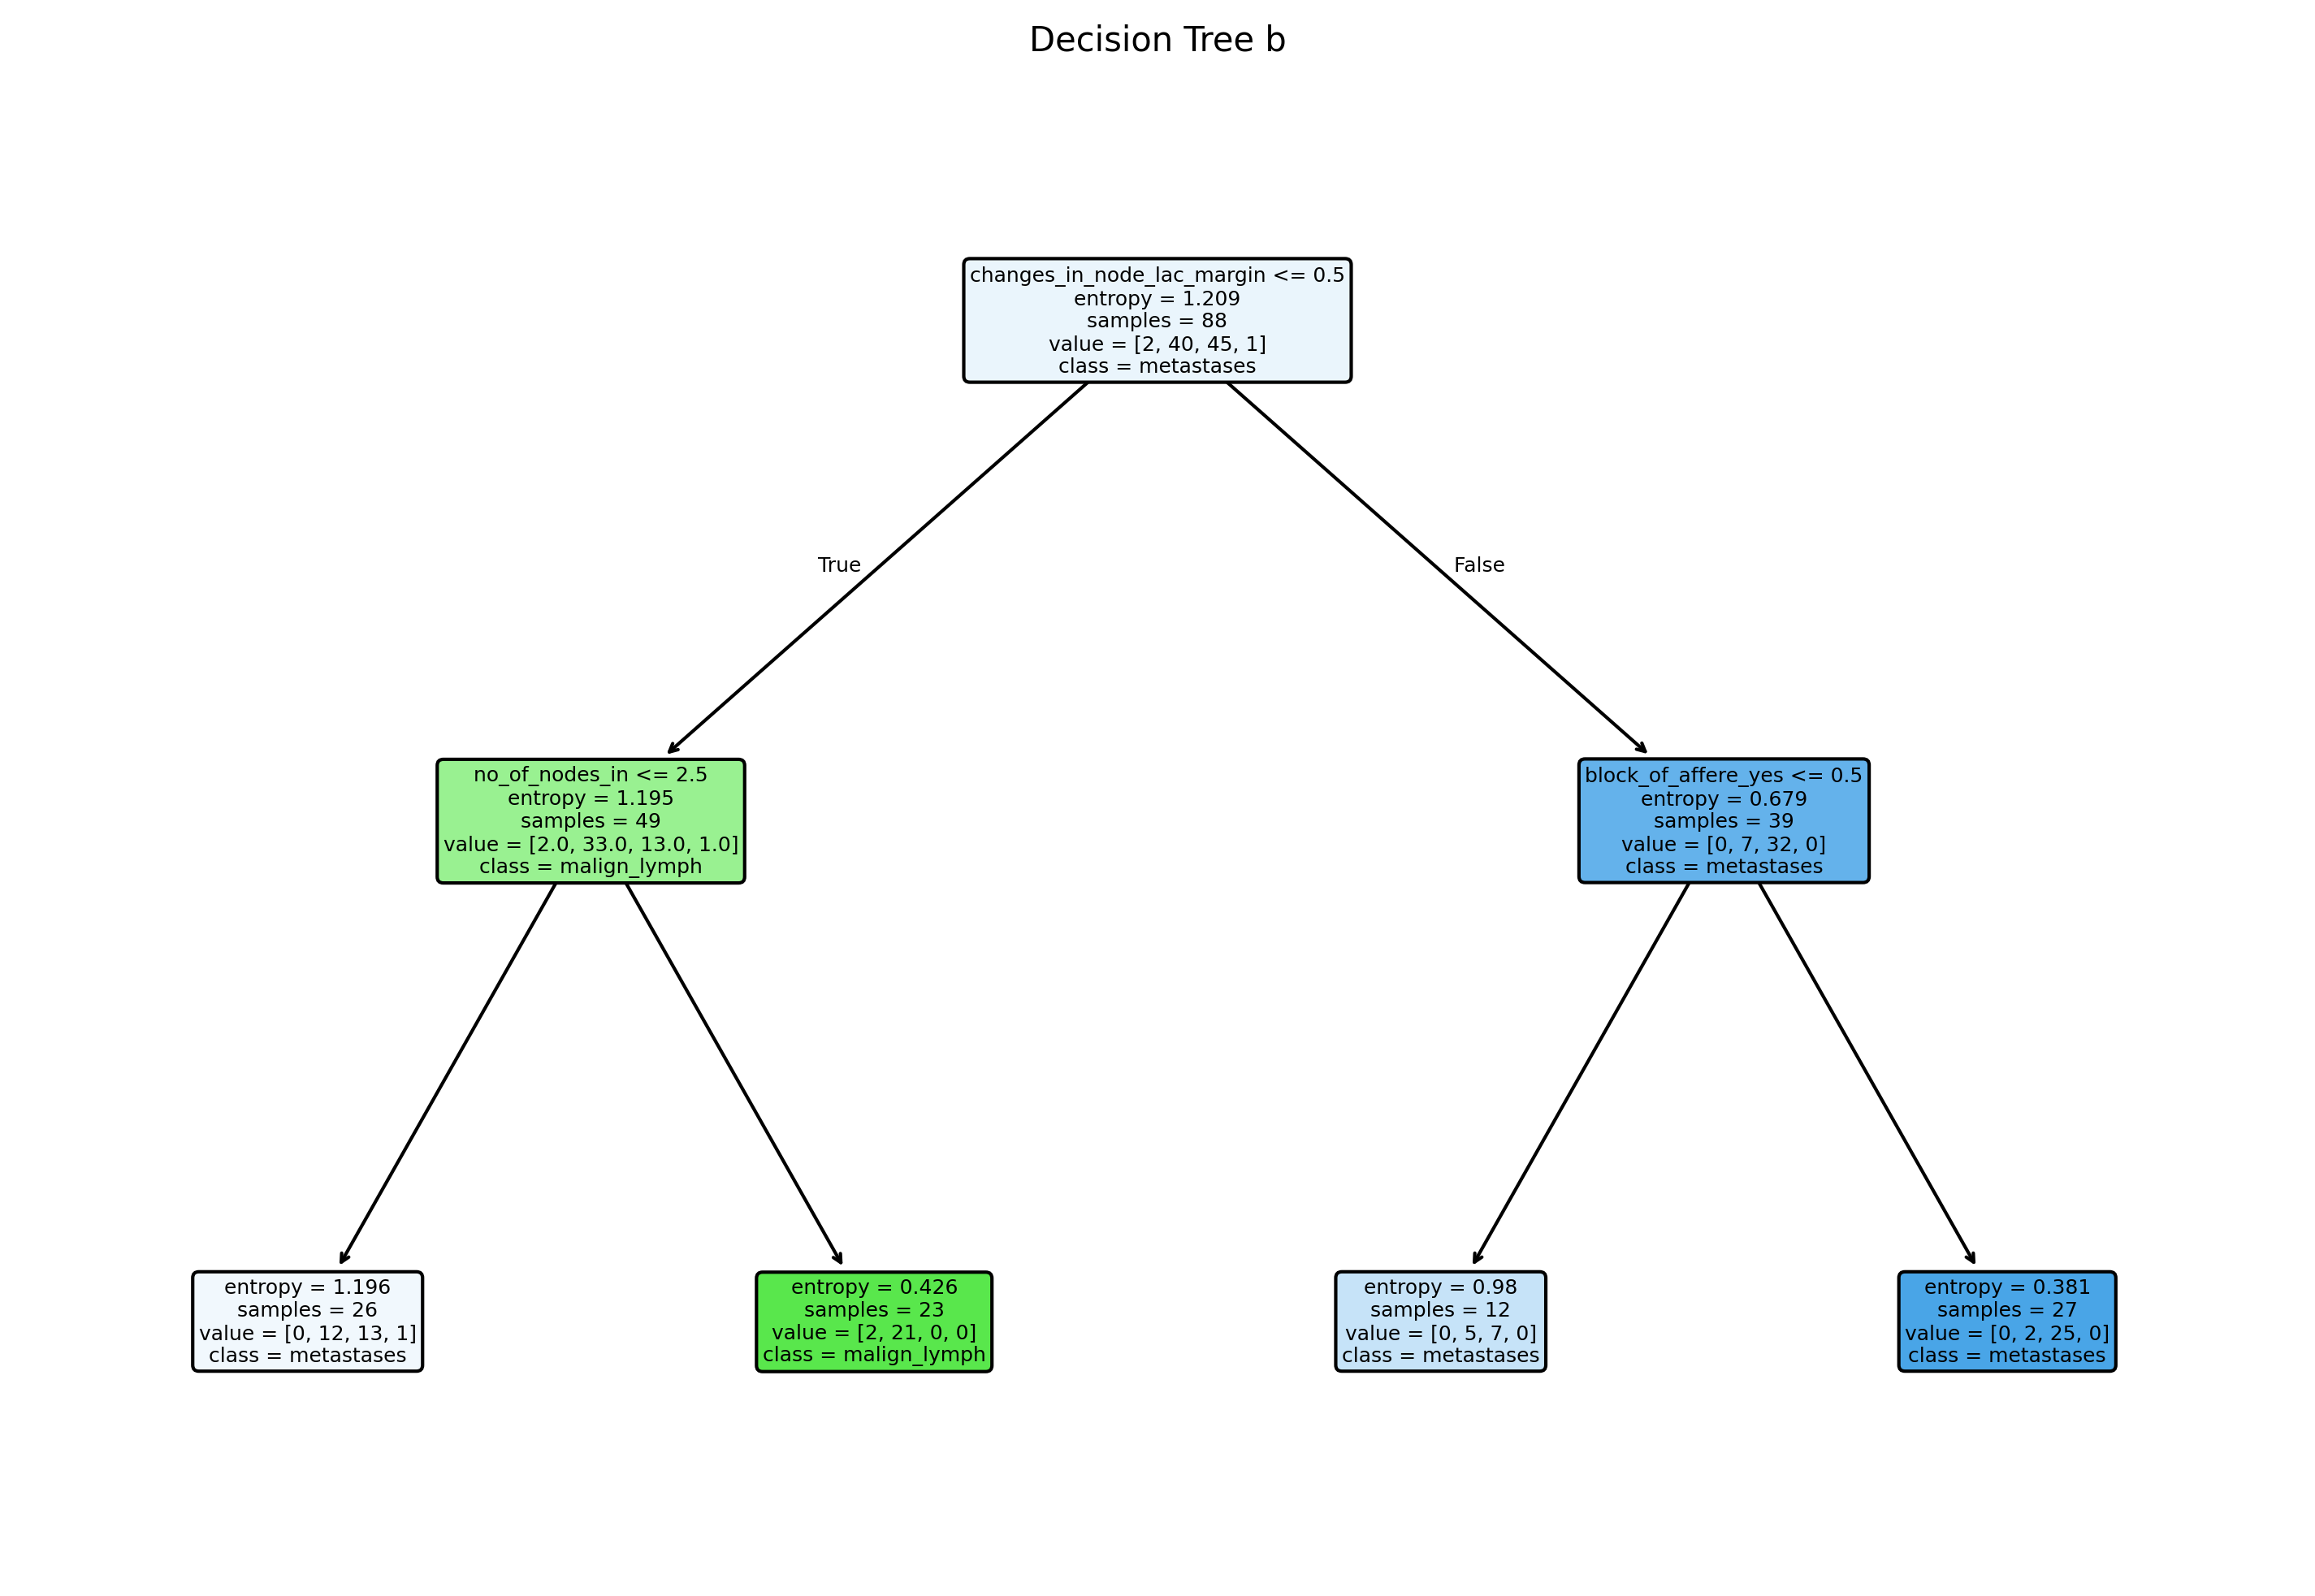

In [26]:

#.............................................................................
# write the rest here

clf_b = DecisionTreeClassifier(criterion='entropy', min_samples_split=32, random_state=32)
clf_b.fit(X_train, y_train)
y_pred_b = clf_b.predict(X_test)
accuracy_b = accuracy_score(y_test, y_pred_b)
print('\nAccuracy:', accuracy_b)

plt.figure(figsize=(12, 8), dpi=300)
plot_tree(clf_b, filled=True, feature_names=X_train.columns, class_names=[str(cls) for cls in clf_b.classes_], rounded=True, fontsize=6)
plt.title('Decision Tree b', fontsize=10)
plt.show()


#.............................................................................




---


**Put your discussion here**

*TODO:*
Discuss here.







---


# Question 2. (5 points)
##Part (a):
*  Write a Python function named "preprocess" that preprocesses and prepares
datasets for machine learning. It must take a training dataset and an optional test dataset as input. The code must first identify categorical and numerical attributes, then handle missing values by imputing the mean for numerical attributes and the most frequent value for categorical attributes. It is worth noting that to determine if an attribute is numerical, the process should involve checking its data type and potentially examining the number of unique values. This is necessary because an attribute may appear to have an "object" data type but could, in fact, be numerical in nature.

*  Subsequently, the "preprocess" code must standardize the numerical attributes by removing the mean and scaling to unit variance., and encodes categorical attributes using one-hot encoding.

*  If a test dataset is provided, it must undergo the same preprocessing steps, ensuring that the imputation for missing values and data scaling are performed based on the values obtained from the training dataset, thus maintaining consistency between the two datasets.

*  At the end, the function must return the preprocessed training and test datasets as (X_train, y_train, X_test, y_test) tuple if the test dataset exists. Otherwise it must return (X_train, y_train). X stands for independent processed attributes, while y indicates the class attribute.

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
def preprocess(train_df, test_df=None):
  #.............................................................................
  # write your codes here










  #.............................................................................
  if test_df is not None:
      return X_train, y_train, X_test, y_test
  else:
      # If no test dataset is provided, return only the preprocessed training dataset
      return X_train, y_train


## Part (b)
In this task, your objective is to assess the performance of various machine learning classifiers for a credit classification problem. To ensure result reproducibility, set the random_state to 42 in KFold, Decision Tree, MLP Neural Network, and Random Forest. For the MLP, configure two hidden layers with 100 and 50 hidden units, respectively, and set max_iter to 1000. For the Random Forest, set the number of trees in the forest to 100. Finally, report the accuracy achieved on the test dataset.

In [ ]:
# import necessary libraries

# Load the training and test datasets
credit_train = pd.read_csv("/content/drive/MyDrive/data-mining-assignment3/datasets/credit-a-train.csv")
credit_test = pd.read_csv("/content/drive/MyDrive/data-mining-assignment3/datasets/credit-a-test.csv")

# Preprocess the datasets and split them into features (X) and target (y)
X_train, y_train, X_test, y_test = preprocess(credit_train, credit_test) # function comes from question 2
  #.............................................................................
  # write your codes here

  # KFold

  # Decision Tree

  # MLP Neural Networks

  # Random Forest


  #.............................................................................



---


**Put your discussion here**


Discuss here.




---


# Question 3. (4 points)
## Part (a)
 Use the ionosphere dataset and Run a 10-fold cross validation to evaluate classification error rate of each algorithm. Use the preprocessing function you have written in question 2. Similar to the previous question, set the random_state to 42 in KFold, Decision Tree, MLP Neural Network, and Random Forest. For the MLP, configure two hidden layers with 100 and 50 hidden units, respectively, and set max_iter to 1000. For the Random Forest, set the number of trees in the forest to 100.

In [ ]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score, KFold

# Load the Ionosphere dataset and preprocess it
ionosphere_dataset = pd.read_csv("/content/drive/MyDrive/data-mining-assignment3/datasets/ionosphere.csv")
X, y = preprocess(ionosphere_dataset)
#.............................................................................
# write your codes here









#.............................................................................

## Part (b)
 Write a piece of code to perform feature selection using mutual information scores (mutual_info_classif in sklearn) on the processed ionosphere dataset (X) with its corresponding class labels (y). Your code must calculate these scores and then must select the top 5 attributes with the highest scores. Report what are these 5 selected attributes.

In [ ]:
# Import the necessary library for feature selection
from sklearn.feature_selection import mutual_info_classif
#.............................................................................
# write your codes here









#.............................................................................

##Part (c)
Using only the top five attributes selected by the previous feature selection method, repeat k-fold validation to report the classification errors for each classifier. Then, discuss whether the results for each classifier have improved and explore the potential reasons behind any changes.

In [ ]:
# Create a new dataset (X_low_dim) with only the selected attributes
X_low_dim = X[selected_attrs]

#.............................................................................
# write your codes here











#.............................................................................



---


**Put your discussion here**


Discuss here.




---


 # Question 4. (4 points)
 Report the classification error rate on each data set and the average classification error rate of each method over all the data sets. Rank the methods according to their average classification error rate. For the top two methods (with the lowest average error rates), are their average error rates significantly different? Why? Comparing the method with the lowest average error rate and the one with the highest error rate, are their error rates significantly different? Why? Briefly discuss the results.

 (or result reproducibility, set the random_state to 42 in KFold, Decision Tree, MLP Neural Network, and Random Forest. Configure the MLP with two hidden layers having 100 and 50 hidden units, and set max_iter to 1000.)


In [ ]:
#.............................................................................
# write your codes here















#.............................................................................



---


**Put your discussion here**


Discuss here.




---


#Question 5. (14 points)

In [ ]:
#Please include your code for this section below. You may need to define various functions,
#such as a preprocessing function, and incorporate them into your code.






























**For question 5, your detailed report should be presented in a separate PDF file.**